# Solving real world data science tasks with Python Pandas

### #1 Merge the 12 months of data into  a single CSV file 

In [25]:
import pandas as pd 
import os 
import warnings

In [2]:
files = [file for file in os.listdir('C:/Users/media/Downloads/Sales_Data/')]

df = pd.DataFrame()

In [3]:
for file in files: 
    data = pd.read_csv('C:/Users/media/Downloads/Sales_Data/' + file)
    df = pd.concat([df, data])

In [4]:
df.to_csv('total_sales.csv', index = False)

### Uploding Total Year Sales Data 

In [5]:
total_sales = pd.read_csv(r"C:\Users\media\Downloads\Sales_Data\total_sales.csv")
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### #2 Cleaning Dataset 

#### Drop Null Values 

In [6]:
total_sales = total_sales.dropna()
total_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Find 'Or' and Delete it 

In [13]:
total_sales = total_sales[total_sales['Order Date'].str[0:2] != 'Or']
total_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


#### Set Columns datatype to the Correct Type 

In [36]:
total_sales['Price Each'] = total_sales['Price Each'].astype(float)
total_sales['Quantity Ordered'] = total_sales['Quantity Ordered'].astype(float)

In [136]:
total_sales['Order Date'] = pd.to_datetime(total_sales['Order Date'])

### #3 Augment data with additional columns 

#### Add Month Column 

In [26]:
total_sales['Month'] = total_sales['Order Date'].str[0:2]
total_sales['Month'] = total_sales['Month'].astype('int32')
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add Sales Column 

In [39]:
total_sales['Sales'] = total_sales['Quantity Ordered'].multiply(total_sales['Price Each'])
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Add City Column 

In [88]:
total_sales['City'] = total_sales['Purchase Address'].str.extract(r',\s(.*?),\s')
total_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### Add Time Column 

In [146]:
total_sales['Hour'] = total_sales['Order Date'].dt.hour
total_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17


### Q1: What was the best month for sales? How much was earned that month? 

In [46]:
Monthly_Sales = total_sales.groupby('Month').sum()
Monthly_Sales.sort_values(by= 'Sales', ascending= False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114.0,4588415.41,4613443.34
10,22703.0,3715554.83,3736726.88
4,20558.0,3367671.02,3390670.24
11,19798.0,3180600.68,3199603.20
5,18667.0,3135125.13,3152606.75
3,17005.0,2791207.83,2807100.38
7,16072.0,2632539.56,2647775.76
6,15253.0,2562025.61,2577802.26
8,13448.0,2230345.42,2244467.88


In [59]:
import seaborn as sns 
import matplotlib.pyplot as plt

Text(0, 0.5, 'Sales in USD (M)')

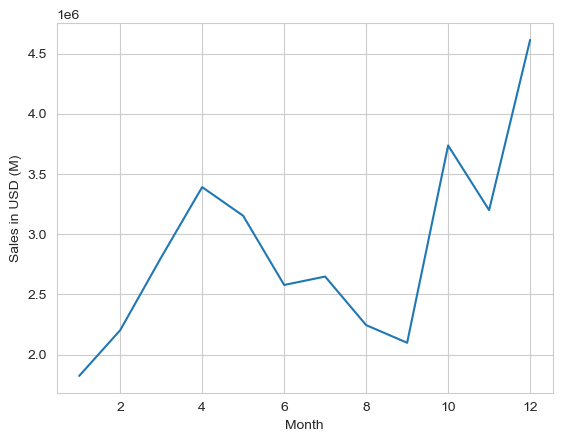

In [60]:
sns.set_style('whitegrid')

sns.lineplot(x= 'Month', y= 'Sales', data= Monthly_Sales)

plt.ylabel('Sales in USD (M)')

# The best month for sales is "December" with $4613443.34 

### Q2: What city had the highest number of sales ? 

In [123]:
City_Sales = total_sales.groupby('City').sum()
City_Sales.sort_values(by= 'Sales', ascending= False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50239.0,8211461.74,315520,8262203.91
Los Angeles,33289.0,5421435.23,208325,5452570.80
New York City,27932.0,4635370.83,175741,4664317.43
Boston,22528.0,3637409.77,141112,3661642.01
Atlanta,16602.0,2779908.20,104794,2795498.58
Dallas,16730.0,2752627.82,104620,2767975.40
Seattle,16553.0,2733296.01,104941,2747755.48
Portland,14053.0,2307747.47,87765,2320490.61
Austin,11153.0,1809873.61,69829,1819581.75


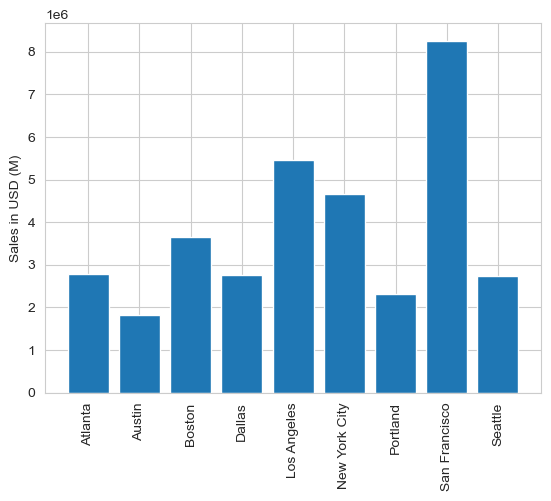

In [157]:
Cities = [city for city, df in total_sales.groupby('City')]

plt.bar(Cities, City_Sales['Sales'])

plt.xticks(Cities, rotation= 'vertical')

plt.ylabel('Sales in USD (M)')

plt.show()

# The city with the highest number of sales is "San Francisco"

### Q3: What time should we display advertisements to maximize likelihood of customer's buying product? 

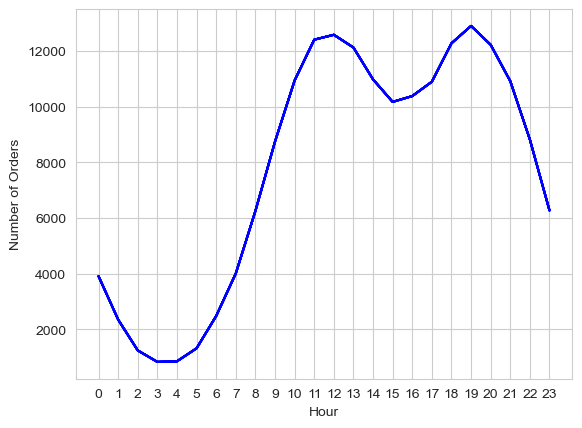

In [156]:
Hours = [hour for hour, df in total_sales.groupby('Hour')]

plt.plot(Hours, total_sales.groupby('Hour').count(), color='blue')

plt.ylabel('Number of Orders')

plt.xticks(Hours)

plt.xlabel('Hour')

plt.show()

#My Recommedation is around 11am or 7pm 


### Q4: What prouducts are most often sold together ? 

In [178]:
df= total_sales[total_sales['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(15)

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [184]:
from itertools import combinations 
from collections import Counter 

In [193]:
count = Counter()

for groups in df['Grouped']:
    row_list = groups.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q5: What products sold the most? and why do you think it sold the most? 

In [218]:
top_products = total_sales.groupby('Product')
quantity_ordered = top_products.sum()['Quantity Ordered']

top = [product for product, df in top_products]

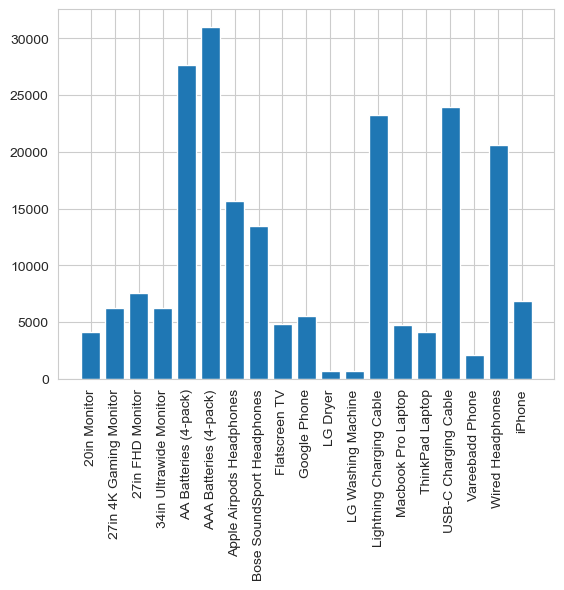

In [226]:
plt.bar(top, quantity_ordered)

plt.xticks(rotation=90)

plt.show()

In [230]:
avg_prices = total_sales.groupby('Product').mean()['Price Each']
print(avg_prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


In [231]:
# Lets try to add a second y label with the average price

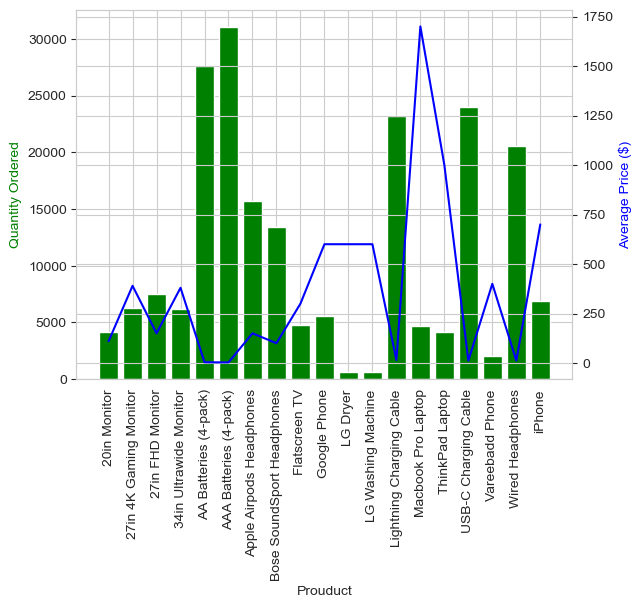

In [234]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(top, quantity_ordered, color= 'green')
ax2.plot(top, avg_prices, 'b-')

ax1.set_xlabel('Prouduct')
ax1.set_ylabel('Quantity Ordered', color= 'g')
ax2.set_ylabel('Average Price ($)', color= 'b')
ax1.set_xticklabels(top, rotation= 'vertical')

plt.show()

# I think the AA, AAA Batteries sells the most because it's cheap, While Macbooks, for example, is very expensive. 